## 2022.07.15

导入依赖包：

In [10]:
import numpy as np
import pygad

定义优化问题：

y = f(w1:w6) = w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6，其中(x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)，并且y=44

找到权重，使得等式成立。

In [11]:
function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

定义目标函数：

In [12]:
def fitness_func(solution, solution_idx):
    output = np.sum(solution*function_inputs)
    fitness = 1.0 / (np.abs(output - desired_output) + + 0.000001) # 防止0除
    return fitness

定义遗传算法类的输入参数：

In [13]:
fitness_function = fitness_func

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 40

创建遗传算法类实例pygad.GA：

In [14]:
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    init_range_low=init_range_low,
    init_range_high=init_range_high,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    # gene_type=int,
    # gene_space=[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]],
)

开始优化过程：

In [15]:
ga_instance.run()

遗传优化迭代过程：

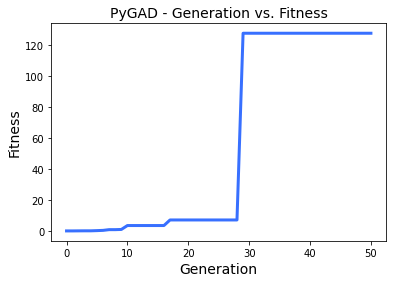

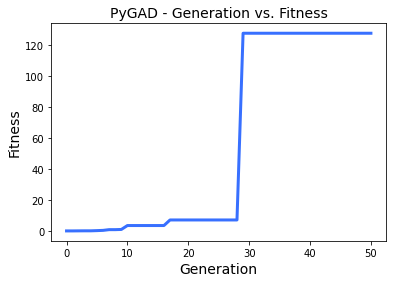

In [26]:
ga_instance.plot_fitness()

可以看到，遗传到28代结果已经收敛。

获取优化结果：

In [27]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print('Index of the best solution: {solution_index}'.format(solution_index=solution_idx))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 3.5502078   6.5626238   2.19178259  2.943488   -1.35013857 -1.21107398]
Fitness value of the best solution = 127.63940286448698
Index of the best solution: 0
Predicted output based on the best solution : 44.00783457128095


## 2022.07.17

导入依赖包：

In [220]:
import numpy as np
import pygad

定义优化问题：

将数组尽可能均分成等分的子数组，满足：
* 子数组的和彼此接近；
* 子数组的元素数量彼此接近。

最终得到子数组列表。

In [221]:

input_array = np.array([4,5,6,5,11,7,20,18,20,21, 43, 37, 40, 23, 45, 39, 28, 12, 9, 16, 23, 34, 31])
# test_arr = np.array([1,1,1,0,1,1,1,0,0,1])
groups = 3

# len(input_array)
# test_res = input_array[test_arr==1]
# test_res

# idx = np.where(test_arr ==1)[0]
# print(idx.tolist())
# input_array[idx]

#sol_list = np.array([[0,1,0,1,0,0,0,0,0,1],[0,0,0,0,0,1,1,1,0,0],[1,0,1,0,1,0,0,0,1,0]]).tolist()

定义目标函数：

In [222]:
def returnMatches(a,b):
    [i for i, j in zip(a, b) if i == j]
    return list(set(a) & set(b))

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]))

"""
solution为0、1组成的数组，长度 = 输入原始数据的长度 * 分成的组数
1表示相应项被选中，1表示相应项未被选中
"""
def fitness_func(solution, solution_idx):

    all_idx = range(0,len(input_array))

    # 分成三组
    subset_1 = solution[0:len(input_array)]
    subset_2 = solution[len(input_array):]

    idx_1 = np.where(subset_1==1)[0].tolist()
    idx_2 = np.where(subset_2==1)[0].tolist()

    # 根据第一、二组计算第三组
    subset_3 = np.zeros(len(input_array),dtype=np.int8)
    idx_3 = list(set(all_idx).difference(set(idx_1 + idx_2)))
    subset_3[idx_3] = 1

    sol_list = np.array((subset_1, subset_2, subset_3)).tolist()
    subset_sum = [sum(input_array[np.where(np.array(v)==1)[0]]) for v in sol_list]
    subset_len = np.array((len(idx_1), len(idx_2), len(idx_3)))

    # 目标函数最小化
    constrains_1 = np.max(subset_sum) - np.min(subset_sum)
    constrains_2 = np.max(subset_len) - np.min(subset_len)
    constrains_3 = len(returnMatches(idx_1, idx_2))
    objective = 100 * constrains_1 + constrains_2 + 1000 * constrains_3

    # 得分函数最大化
    fitness = 1.0 / (objective + 0.000001) # 防止0除
    return fitness

定义遗传算法类的输入参数：

In [223]:
fitness_function = fitness_func

num_generations = 600
num_parents_mating = 5

# 每个种群解的数量；基因数量
sol_per_pop = 5
num_genes = 2 * len(input_array)

# 基因初始值的最大、最小值
init_range_low = 0
init_range_high = 1

# 基因数据类型、数据空间
gene_type = int
gene_space = [0,1] # 每个基因的解空间一致时使用此方式，可针对每个基因分别设置解空间

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 60

创建遗传算法类实例pygad.GA：

In [224]:
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    init_range_low=init_range_low,
    init_range_high=init_range_high,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    gene_type=gene_type,
    gene_space=gene_space,
    on_generation=callback_generation,
)

开始优化过程：

In [225]:
ga_instance.run()

Generation = 1
Fitness    = 0.00010095911154962553
Generation = 2
Fitness    = 0.00010095911154962553
Generation = 3
Fitness    = 0.00015149219812884529
Generation = 4
Fitness    = 0.00015149219812884529
Generation = 5
Fitness    = 0.00015149219812884529
Generation = 6
Fitness    = 0.00015149219812884529
Generation = 7
Fitness    = 0.00015149219812884529
Generation = 8
Fitness    = 0.00015149219812884529
Generation = 9
Fitness    = 0.00015149219812884529
Generation = 10
Fitness    = 0.00015149219812884529
Generation = 11
Fitness    = 0.00015149219812884529
Generation = 12
Fitness    = 0.00015149219812884529
Generation = 13
Fitness    = 0.00015149219812884529
Generation = 14
Fitness    = 0.00015149219812884529
Generation = 15
Fitness    = 0.00019219680949602214
Generation = 16
Fitness    = 0.00019219680949602214
Generation = 17
Fitness    = 0.00019219680949602214
Generation = 18
Fitness    = 0.00019219680949602214
Generation = 19
Fitness    = 0.00019219680949602214
Generation = 20
Fitne

遗传优化迭代过程：

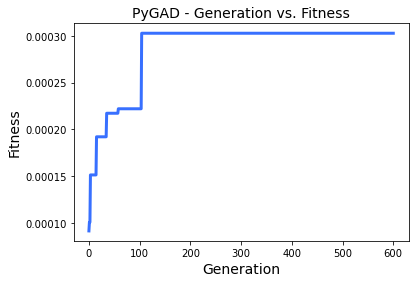

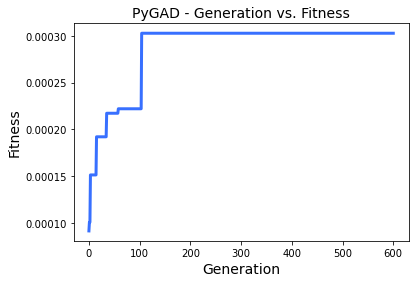

In [226]:
ga_instance.plot_fitness()

可以看到，遗传到100代结果已经收敛。

获取优化结果：

In [227]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print('Index of the best solution: {solution_index}'.format(solution_index=solution_idx))


Parameters of the best solution : [0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 0 0 0 1 0 0 0]
Fitness value of the best solution = 0.0003027550710557811
Index of the best solution: 0
